In [1]:
from datetime import datetime, date, time, timedelta
import numpy as np
import sys
import glob
sys.version

'2.7.9 |Anaconda 2.2.0 (x86_64)| (default, Dec 15 2014, 10:37:34) \n[GCC 4.2.1 (Apple Inc. build 5577)]'

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure', figsize=(10, 8))
mpl.__version__

'1.4.3'

In [3]:
import pandas as pd
from pandas import Series, DataFrame, Panel
import seaborn as sns
import IPython.display as IPdisplay
from PIL import Image as PIL_Image
from images2gif import writeGif
sns.__version__

'0.5.1'

In [4]:
filepath = "/Users/rokickik/Dropbox/MakerDev/BeeMonitor/2015-03/201405-201503.log"
probe_names = [ "T%i"%i for i in range(1,21) ]
col_names = ['Date','Time','Voltage','Charge','IsCharging','TEnclosure']
col_names += probe_names

dateparse = lambda x,y: pd.datetime.strptime("%s %s"%(x,y), '%Y/%m/%d %H:%M:%S')

data = pd.read_csv(filepath, sep=',',
                    names=col_names,
                    parse_dates={'Timestamp': ['Date', 'Time']},
                    date_parser=dateparse,
                    index_col='Timestamp')
df = data
df.head()

,Voltage,Charge,IsCharging,TEnclosure,T1,T2,T3,T4,T5,T6,...,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-05-18 23:43:27,3.78,29,off,23.25,-127,-127,-127,-127,-127,-127,...,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127
2014-05-18 23:43:31,3.77,27,off,23.25,-127,-127,-127,-127,-127,-127,...,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127
2014-05-18 23:48:31,3.87,44,off,23.00,-127,-127,-127,-127,-127,-127,...,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127
2014-05-18 23:53:31,3.87,44,off,23.00,-127,-127,-127,-127,-127,-127,...,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127
2014-05-18 23:58:31,3.87,44,off,23.00,-127,-127,-127,-127,-127,-127,...,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127


In [5]:
# Replace bad values with NaN
df = df.replace(to_replace=-127, value=np.nan)
df = df.replace(to_replace=0, value=np.nan)
df = df.replace(to_replace=85, value=np.nan)

#We can use this code to check to see if there are any other outliers we need to fix
#df2 = df.ix[:, probe_names]
#df2[df2[df2 > 50].any(1)]

# Add Mean
df['TMean'] = df[probe_names].mean(axis=1)

# Relabel probes for consistent topology
df.rename(columns={'T16': 'T_13', 'T13': 'T_14', 'T14': 'T_15', 'T15': 'T_16'}, inplace=True)
df.rename(columns={'T_13': 'T13', 'T_14': 'T14', 'T_15': 'T15', 'T_16': 'T16'}, inplace=True)


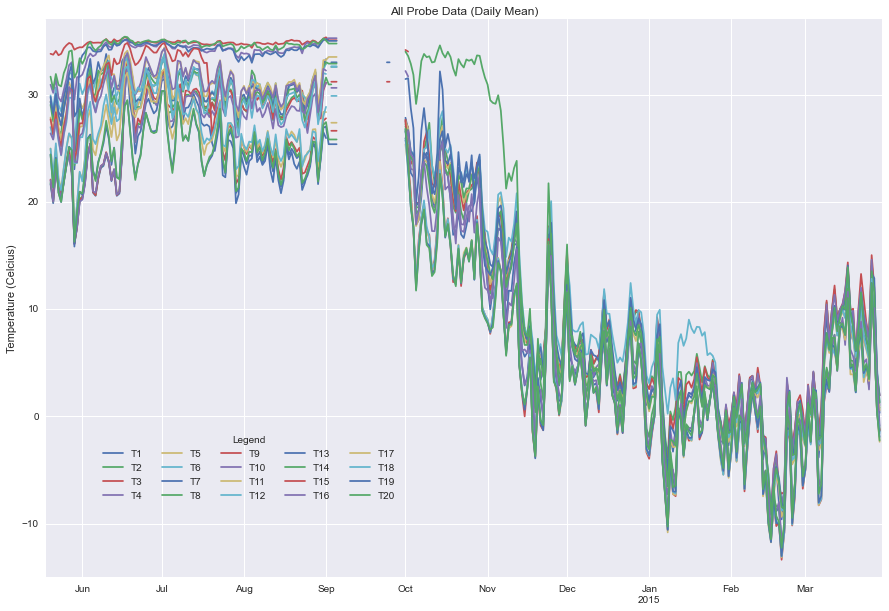

In [6]:
df2 = df.ix[:, probe_names]
df2 = df2.resample('1D', how='mean')
ax1 = df2.plot(subplots=False, figsize=(15, 10))
ax1.set_title('All Probe Data (Daily Mean)')
ax1.set_ylim(-15,37)
ax1.set_xlabel('')
ax1.set_ylabel('Temperature (Celcius)')
plt.legend(loc="lower left", ncol=5, title="Legend", 
           bbox_to_anchor=(0.17, 0.22), bbox_transform=plt.gcf().transFigure)

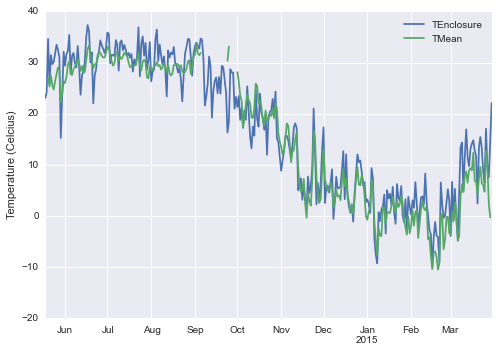

In [7]:
df2 = df.ix[:, ['TEnclosure', 'TMean']]
df2 = df2.resample('1D', how='mean')
df2 = df2.ix['2014-05-01':'2015-03-30']
ax1 = df2.plot()
ax1.set_xlabel('')
ax1.set_ylabel('Temperature (Celcius)')

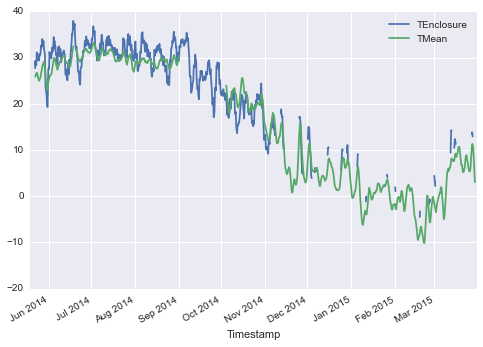

In [8]:
df2 = df.ix[:, ['TEnclosure', 'TMean']]
pd.rolling_mean(df2, window=588).plot(grid=True)

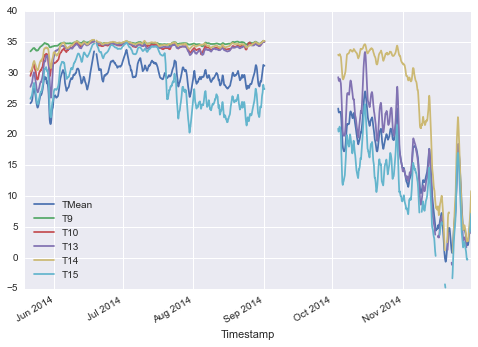

In [9]:
df2 = df.ix[:, ['TMean', 'T9', 'T10', 'T13', 'T14', 'T15']]
df2 = df2.ix['2014-05-01':'2014-11-30']
pd.rolling_mean(df2, window=288).plot()

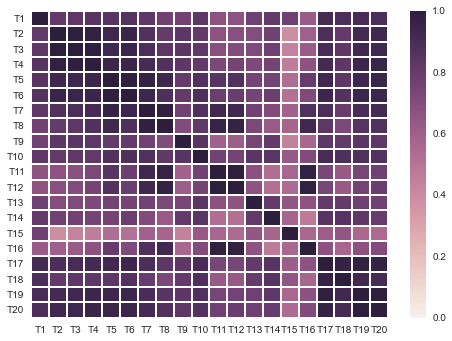

In [10]:
import calendar
months = [calendar.month_name[i] for i in range(1,13)]

def plot_corr(data,i,figsize=(8,8)):
    month = months[i-1]
    pwc = df2.corr(method='pearson')
    sns.heatmap(pwc, vmin=0, vmax=1)
    #f, ax = plt.subplots(figsize=figsize)
    #cmap = sns.diverging_palette(220, 10, as_cmap=True)
    #sns.corrplot(df2, cbar=False, annot=False, diag_names=False, cmap=cmap, cmap_range=(0,1), ax=ax)
    #plt.title("Probe Correlations for %s"%month)
    #f.tight_layout()
    #plt.savefig("corr_%d.png"%i)
    #plt.clf()
 
#for i in range(6,13):
if True:
    i = 7
    date = "2014-%d"%i
    df2 = df.ix[:, probe_names]
    df2 = df2.ix[date:date]
    plot_corr(df2,i)

In [11]:
df2 = df.ix[:, probe_names]
df2 = df2.resample('1H', how='mean')
df2['Month'] = df2.index.map(lambda a: "%s"%(a.strftime("%B")))
df2 = df2.ix['2014-05':'2014-10']

import calendar
months = [calendar.month_name[i] for i in range(1,13) if calendar.month_name[i] in df2['Month'].unique()]
ticks = [10, 20, 30, 40]

#for i in range(1,20):
#    g = sns.FacetGrid(df2, col="Month", margin_titles=True, size=2, col_order=months)
#    g.map(plt.scatter, "T20", "T%i"%i, alpha=.3, s=3)
#    g.set(xticks=ticks, yticks=ticks);



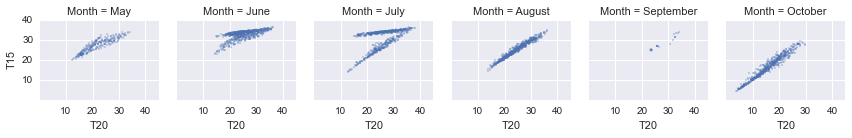

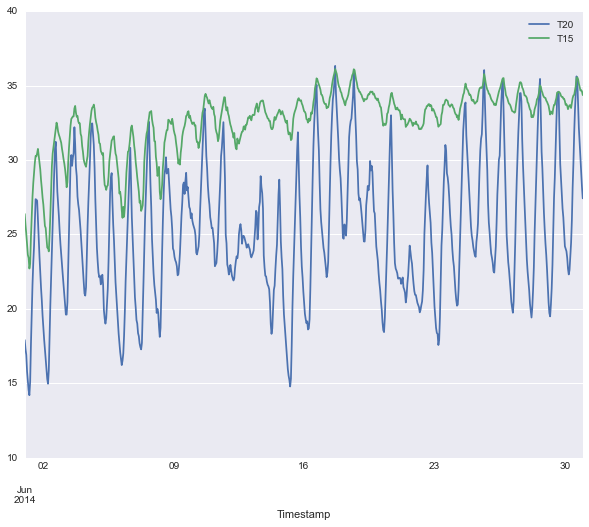

In [12]:
df2 = df.ix[:, probe_names]
df2 = df2.resample('1H', how='mean')
df2['Month'] = df2.index.map(lambda a: "%s"%(a.strftime("%B")))
df2 = df2.ix['2014-05':'2014-10']

import calendar
months = [calendar.month_name[i] for i in range(1,13) if calendar.month_name[i] in df2['Month'].unique()]
ticks = [10, 20, 30, 40]

g = sns.FacetGrid(df2, col="Month", margin_titles=True, size=2, col_order=months)
g.map(plt.scatter, "T20", "T15", alpha=.3, s=3)
g.set(xticks=ticks, yticks=ticks);

df2 = df.ix[:, ['T20', 'T15']]
df2 = df2.resample('1H', how='mean')
df2 = df2.ix['2014-06':'2014-06']
df2.plot(grid=True)


In [46]:
def plot_probes(data,title,figsize=(16,8),ylim=(15,36),linewidth=1,markevery=5):
    plt.figure(figsize=figsize, facecolor='white')
    plt.title(title)
    colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey')
    lines = ('-', '-', '-', '-')
    markers = ('', '.', 'd')
    l = 0
    c = 0
    m = 0
    for i in range(1,21):
        if (c>len(colors)-1):
            c = 0
            l += 1
            m += 1
        color = colors[c]
        line = lines[l]
        marker = markers[m]
        try:
            pd = data["T%s"%i]
            ax1 = pd.plot(color=color, style=line, linewidth=linewidth, marker=marker, markevery=markevery)
            ax1.set_xlabel('')
            ax1.set_ylabel('Temperature (Celcius)')
        except KeyError:
            pass
        c += 1

    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.ylim(ylim)
    
dfdt = df.ix[:, probe_names]
dfdt['Date'] = dfdt.index
dfdt['Date'] = dfdt['Date'].apply(lambda v: v.date())
dfdt['Time'] = dfdt.index
dfdt['Time'] = dfdt['Time'].apply(lambda v: v.time())

df5tm = dfdt.resample('5T', how='mean')
df5tm['Date'] = df5tm.index
df5tm['Date'] = df5tm['Date'].apply(lambda v: v.date())
df5tm['Time'] = df5tm.index
df5tm['Time'] = df5tm['Time'].apply(lambda v: v.time())

df10ts = dfdt.resample('1H', how='std')
df10ts['Date'] = df10ts.index
df10ts['Date'] = df10ts['Date'].apply(lambda v: v.date())
df10ts['Time'] = df10ts.index
df10ts['Time'] = df10ts['Time'].apply(lambda v: v.time())

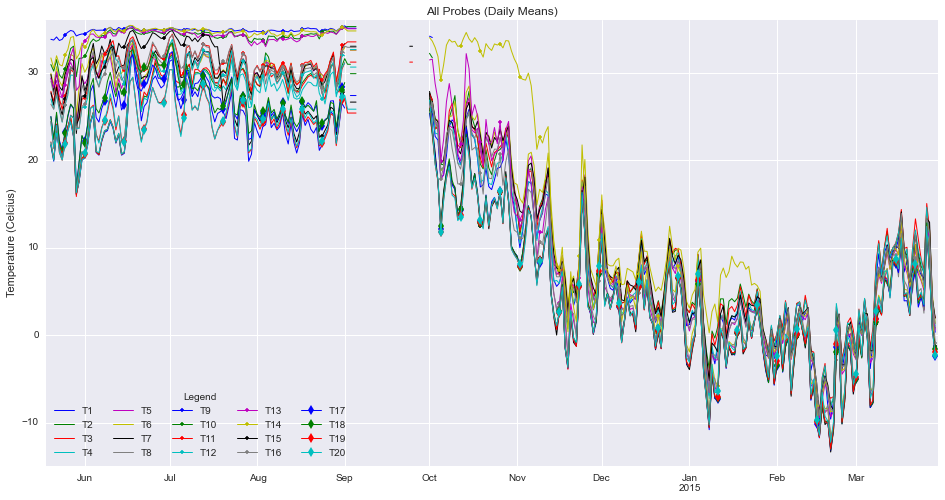

In [19]:
df2 = dfdt.resample('1D', how='mean')
plot_probes(df2,"All Probes (Daily Means)",ylim=(-15,36),linewidth=1,markevery=7)
plt.legend(loc="lower left", ncol=5, title="Legend")
plt.show()

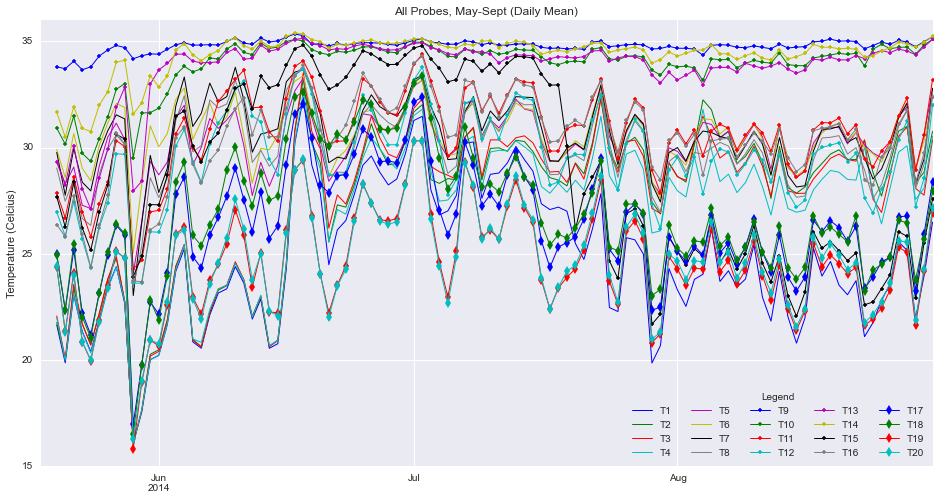

In [21]:
df2 = dfdt.ix['2014-5':'2014-8'].resample('1D', how='mean')
plot_probes(df2,"All Probes, May-Sept (Daily Mean)",ylim=(15,36),linewidth=1,markevery=1)
plt.legend(loc="lower right", ncol=5, title="Legend")
plt.show()

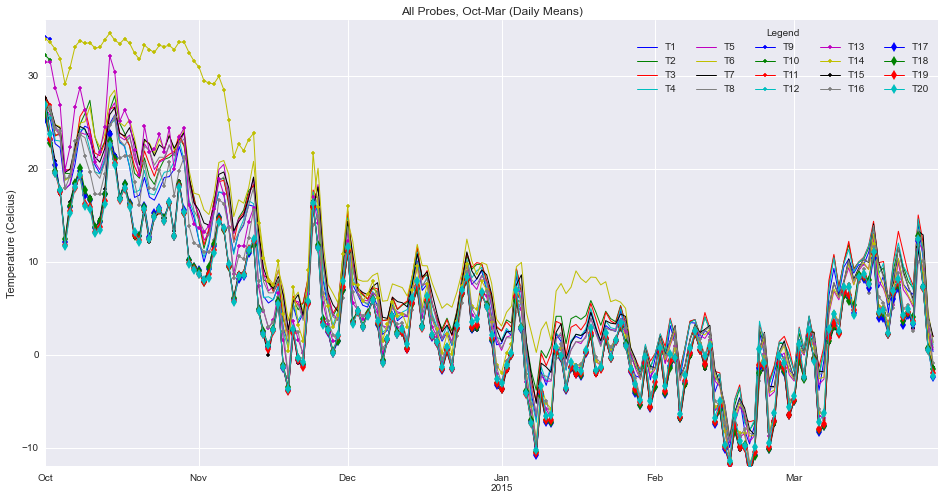

In [15]:
df2 = dfdt.ix['2014-10':'2015-4-1'].resample('1D', how='mean')
plot_probes(df2,"All Probes, Oct-Mar (Daily Means)",ylim=(-12,36),linewidth=1,markevery=1)
plt.legend(loc="upper right", ncol=5, title="Legend")
plt.show()

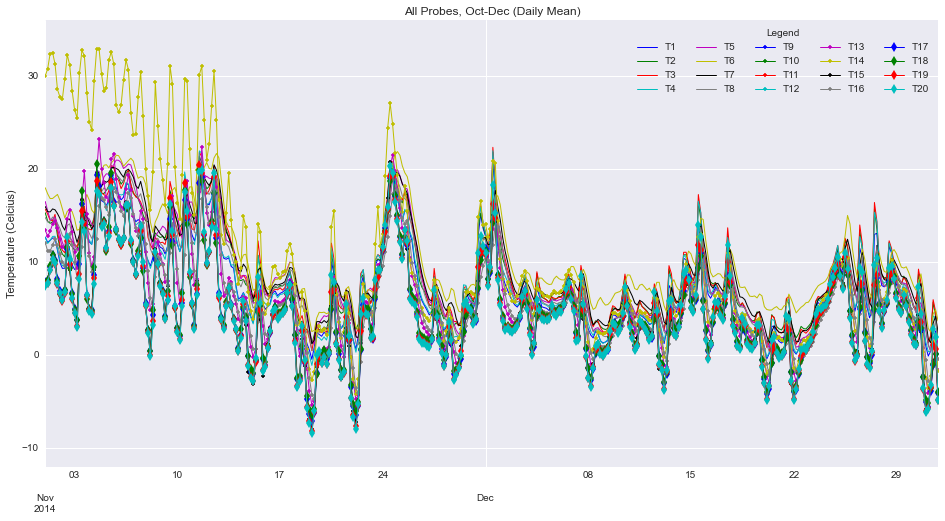

In [16]:
df2 = dfdt.ix['2014-11':'2014-12'].resample('4H', how='mean')
plot_probes(df2,"All Probes, Oct-Dec (Daily Mean)",ylim=(-12,36),linewidth=1,markevery=1)
plt.legend(loc="upper right", ncol=5, title="Legend")
plt.show()

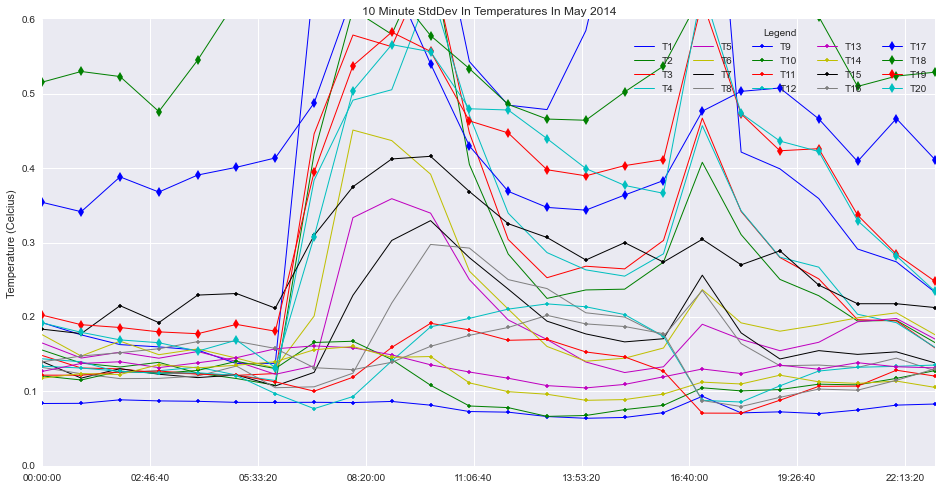

In [25]:
#df2 = dfdt2.ix['2014-5':'2014-5']
#dfm = df2.groupby("Time").mean()
#plot_probes(dfm,"Average Daily Temperatures In May 2014",linewidth=1)
#plt.legend(loc="lower right", ncol=5, title="Legend")

df2 = df10ts.ix['2014-5':'2014-8']
dfm = df2.groupby("Time").mean()
plot_probes(dfm,"10 Minute StdDev In Temperatures In May 2014",ylim=(0,0.6),linewidth=1,markevery=1)
plt.legend(loc="upper right", ncol=5, title="Legend")

#df2 = dfdt2.ix['2014-6':'2014-6']
#dfm = df2.groupby("Time").mean()
#plot_probes(dfm,"Average Daily Temperatures In June 2014")
#plt.legend(loc="lower right", ncol=5, title="Legend")

#df2 = dfdt2.ix['2014-7':'2014-7']
#dfm = df2.groupby("Time").mean()
#plot_probes(dfm,"Average Daily Temperatures In July 2014")
#plt.legend(loc="lower right", ncol=5, title="Legend")

#df2 = dfdt2.ix['2014-8':'2014-8']
#dfm = df2.groupby("Time").mean()
#plot_probes(dfm,"Average Daily Temperatures In August 2014")
#plt.legend(loc="lower right", ncol=5, title="Legend")


In [28]:
def generate_png_per_day(data,basename,title,ylim=(-6,40),rolling_days=5,start_index=None,legend_flip_index=None):
    legend_loc="lower right"
    last_date = data.index[-1]
    start_date = data.index[0]
    start_date = datetime(start_date.year, start_date.month, start_date.day)
    end_date = start_date + timedelta(days=rolling_days, minutes=-1)
    i = 0
    while True:
        if start_date>last_date: break
        rows = data.ix[start_date:end_date]
        start_date = start_date + timedelta(days=1)
        end_date = end_date + timedelta(days=1)
        if end_date>last_date: end_date = last_date
        if start_index and i<start_index:
            i += 1
            continue
        if i>=legend_flip_index:
            legend_loc = "upper right"
        dfm = rows.groupby("Time").mean()
        plot_probes(dfm,"%s (%s)"%(title,start_date.date()),ylim=ylim)
        plt.legend(loc=legend_loc, ncol=5, title="Legend")
        plt.savefig('images/%s/img%s.png'%(basename,str(i).zfill(3)), bbox_inches='tight')
        plt.close();
        i += 1
        
def get_images(basename):
    images = [PIL_Image.open(image) for image in glob.glob("images/%s/*.png"%basename)]
    images.pop()
    images.pop(0)
    return images

In [26]:
df2 = df5tm.ix['2014-5':'2015-5']
gifname = 'dailytemp2'
title = "Average Daily Temperatures, 5 Day Rolling Average"
generate_png_per_day(df2,gifname,title,ylim=(-6,40),rolling_days=5,legend_flip_index=178)
images = get_images(gifname)
file_path_name = "images/%s.gif"%gifname
writeGif(file_path_name, images, duration=0.1)
IPdisplay.Image(url=file_path_name)

In [29]:
data = df5tm.ix['2014-5':'2015-5']
gifname = 'dailytemp3'
title = "Average Daily Temperatures"
generate_png_per_day(data,gifname,title=title,ylim=(-10,40),rolling_days=1,legend_flip_index=178)
images = get_images(gifname)
file_path_name = "images/%s.gif"%gifname
writeGif(file_path_name, images, duration=0.1)
IPdisplay.Image(url=file_path_name)

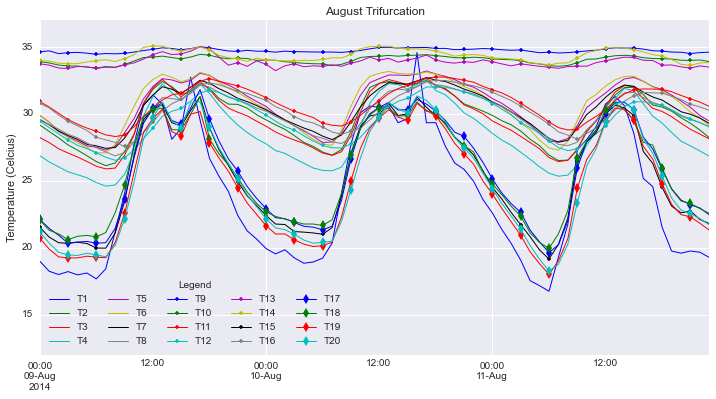

In [82]:
probes = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
df3 = df.ix['2014-8-9':'2014-8-11', probe_names]
df3 = df3.resample('1H', how='mean')
plot_probes(df3,"August Trifurcation",figsize=(12,6),ylim=(12,37),linewidth=1,markevery=3)
plt.legend(loc="lower left", ncol=5, title="Legend")